In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Input Files:

In [10]:
emicron = pd.read_csv('../../Data/emicron_merged.csv')
workers = pd.read_csv('../../Data/Módulo de personal ocupado.csv')

Adjusting for rows with repeated IDs due to worker information:

In [11]:
workers=workers[['DIRECTORIO', 'SECUENCIA_P', 'SECUENCIA_ENCUESTA', 'TIPO', 'P3079', 'P3080', 'P3084']]

In [12]:
workers

,DIRECTORIO,SECUENCIA_P,SECUENCIA_ENCUESTA,TIPO,P3079,P3080,P3084
0,2120038,2,1,1,400000.0,2,2
1,2120076,1,1,3,NaN,2,2
2,2120086,1,1,1,600000.0,2,2
3,2120122,3,1,2,NaN,2,2
4,2120128,1,1,2,NaN,2,2
...,...,...,...,...,...,...,...
23713,7277008,1,1,1,1000000.0,2,2
23714,7277028,1,1,1,1000000.0,1,1
23715,7277028,1,2,1,1000000.0,1,1
23716,7277065,1,1,2,NaN,2,2


In [13]:
identifying_variables = ['DIRECTORIO', 'SECUENCIA_P', 'SECUENCIA_ENCUESTA']

# summary metric of worker module variables
df_filled = workers.copy()
for column in ['TIPO', 'P3080', 'P3084', 'P3079']:
    df_filled[column] = df_filled.groupby(identifying_variables)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

In [14]:
duplicates = df_filled[df_filled.duplicated()]
print(duplicates)

       DIRECTORIO  SECUENCIA_P  SECUENCIA_ENCUESTA  TIPO      P3079  P3080  \
6         2120147            2                   1     1   800000.0      2   
25        2120210            1                   1     1   360000.0      2   
35        2120292            1                   1     1    80000.0      2   
37        2120307            1                   1     1   390000.0      2   
92        2120853            1                   1     1  1500000.0      2   
...           ...          ...                 ...   ...        ...    ...   
23627     7275724            1                   1     2        NaN      2   
23657     7276164            7                   1     2        NaN      2   
23673     7276357            1                   1     1   250000.0      2   
23703     7276862            1                   1     1  1117000.0      1   
23711     7276998            1                   1     1  1200000.0      2   

       P3084  
6          2  
25         2  
35         2  
37 

In [15]:
df_filled.drop_duplicates(inplace=True)

In [16]:
# keep only emicron rows with unique IDs
emicron= emicron.drop_duplicates(subset=identifying_variables)
# only one row per firm
emicron = pd.merge(emicron, df_filled, on=identifying_variables, how='left')

Checking if correct merge: comparison with official DANE statistics from ...

In [17]:
emicron['man']=np.where(emicron['P35']==1, 1, 0)

weighted_value_counts = emicron.groupby('man')['F_EXP'].sum()

percentage = (weighted_value_counts / emicron['F_EXP'].sum()) * 100

result = pd.DataFrame({'Percentage': percentage})

print(result)

     Percentage
man            
0     34.803971
1     65.196029


In [18]:
emicron['employer']=np.where(emicron['P3033']==1, 1, 0)

weighted_value_counts = emicron.groupby('employer')['F_EXP'].sum()

percentage = (weighted_value_counts / emicron['F_EXP'].sum()) * 100

result = pd.DataFrame({'Percentage': percentage})

print(result)

          Percentage
employer            
0          89.225439
1          10.774561


In [19]:
weighted_value_counts = emicron.groupby('GRUPOS12')['F_EXP'].sum()

percentage = (weighted_value_counts / emicron['F_EXP'].sum()) * 100

result = pd.DataFrame({'Percentage': percentage})

print(result.sort_values(by='Percentage', ascending=False))

          Percentage
GRUPOS12            
5          25.589060
1          21.062375
6          11.036197
3          10.837104
12          9.009469
7           8.014245
4           6.187939
9           4.756407
11          1.087546
2           1.039762
10          0.709776
8           0.644817
13          0.025303


In [20]:
# 1 - tienda, 2 - taller, 3 - oficina, 4 - kiosco
emicron2 = emicron.dropna(subset=['P3096'])

weighted_value_counts = emicron2.groupby('P3096')['F_EXP'].sum()

percentage = (weighted_value_counts / emicron2['F_EXP'].sum()) * 100

result = pd.DataFrame({'Percentage': percentage})

print(result.sort_values(by='Percentage', ascending=False))

       Percentage
P3096            
1.0     74.693541
2.0     15.122125
3.0      7.391522
4.0      2.792812


In [21]:
emicron['rut']=np.where(emicron['P1633']==1, 1, 0)

weighted_value_counts = emicron.groupby('rut')['F_EXP'].sum()

percentage = (weighted_value_counts / emicron['F_EXP'].sum()) * 100

result = pd.DataFrame({'Percentage': percentage})

print(result)

     Percentage
rut            
0      77.52735
1      22.47265


In [22]:
emicron['cam_com']=np.where(emicron['P1055']==1, 1, 0)

weighted_value_counts = emicron.groupby('cam_com')['F_EXP'].sum()

percentage = (weighted_value_counts / emicron['F_EXP'].sum()) * 100

result = pd.DataFrame({'Percentage': percentage})

print(result)

         Percentage
cam_com            
0         89.203322
1         10.796678


In [23]:
#1 - solo, 2 - usted y familia, 3 - usted y otros no familiares, 4 - otros -> they aggregate the categories but seems similar enough
weighted_value_counts = emicron.groupby('P3050')['F_EXP'].sum()

percentage = (weighted_value_counts / emicron['F_EXP'].sum()) * 100

result = pd.DataFrame({'Percentage': percentage})

print(result.sort_values(by='Percentage', ascending=False))

       Percentage
P3050            
1       83.327648
2       11.352694
3        2.410164
5        2.140335
4        0.755200
6        0.013960


In [24]:
emicron=emicron.drop(columns=['man', 'employer', 'rut', 'cam_com'])

#### __Variables to Investigate:__

1. Formalidad de entrada:

P1633: ¿El negocio o actividad tiene Registro Único Tributario (RUT)?

P1055: ¿El negocio o actividad  se encuentra registrado en alguna Cámara de Comercio?

1. Formalidad de insumo:

P3088: ¿Pagó su salud y/o pensión el mes anterior? 

P3090: ¿Pagó su ARL?

P3080: ¿Le pagó salud y/o pensión el mes pasado ?

P3084: ¿Le pagó ARL ?

P3032_3: Trabajadores(as) o familiares sin remuneración?

1. Formalidad tributaria:

P2991: En el último año, ¿realizó las(s) declaracion(es) de impuesto sobre la renta?

P2992: En el último año, ¿realizó las(s) declaracion(es) de IVA (Impuesto al Valor Agregado)?

P2993: En el último año, ¿realizó las(s) declaracion(es) de ICA (Impuesto de Industria y Comercio)?

P640: ¿Cuál es el principal registro que utiliza para llevar sus cuentas?

#### Useful

P986: ¿A que regimen pertenece? -> Necessary to determine whether microbusinesses have to pay taxes and have formal accounting.

P3091: ¿Cuántas personas en promedio trabajaron en su negocio o actividad económica en el año anterior o en los meses de operación? -> Includes the owner, which is necessary to understand if healthcare/pensions should have been paid.

P3079: ¿Cuánto le pagó el mes pasado? -> Unpaid employees don't have health and pensions contributions.

P3031: En su actividad o negocio, ¿tiene personas que le ayudan?

P3032_1: Trabajadores(as) que reciben un pago?

P3032_1: Socios(as)?

P3032_1: Trabajadores(as) o familiares sin remuneración?

In [25]:
inv = emicron[["DIRECTORIO", "P1633", "P1055", "P3088", "P3090", "P3080", "P3084", "P2991", "P2992", "P2993", "P640", "P986", "P3091", "P3079", "P3032_1", "P3032_2", "P3032_3", 'P3031', 'F_EXP']]

In [26]:
inv

,DIRECTORIO,P1633,P1055,P3088,P3090,P3080,P3084,P2991,P2992,P2993,P640,P986,P3091,P3079,P3032_1,P3032_2,P3032_3,P3031,F_EXP
0,2120013,2,2,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN,1,NaN,NaN,NaN,NaN,2,25.099238
1,2120018,2,2,2,2,NaN,NaN,NaN,NaN,NaN,5,NaN,1,NaN,NaN,NaN,NaN,2,22.117173
2,2120022,2,2,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN,1,NaN,NaN,NaN,NaN,2,34.341336
3,2120023,2,2,2,2,NaN,NaN,NaN,NaN,NaN,5,NaN,1,NaN,NaN,NaN,NaN,2,21.413039
4,2120024,2,2,2,2,NaN,NaN,NaN,NaN,NaN,3,NaN,1,NaN,NaN,NaN,NaN,2,122.952097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84748,7277027,2,2,2,2,NaN,NaN,NaN,NaN,NaN,5,NaN,1,NaN,NaN,NaN,NaN,2,15.316276
84749,7277028,1,1,1,1,1.0,1.0,9.0,3.0,1.0,3,2.0,3,1000000.0,2.0,0.0,0.0,1,21.269300
84750,7277029,1,2,1,2,NaN,NaN,9.0,3.0,3.0,3,2.0,1,NaN,NaN,NaN,NaN,2,10.848121
84751,7277065,2,2,2,2,2.0,2.0,NaN,NaN,NaN,3,NaN,3,NaN,0.0,2.0,0.0,1,11.055347


In [27]:
inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84753 entries, 0 to 84752
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DIRECTORIO  84753 non-null  int64  
 1   P1633       84753 non-null  int64  
 2   P1055       84753 non-null  int64  
 3   P3088       84753 non-null  int64  
 4   P3090       84753 non-null  int64  
 5   P3080       10711 non-null  float64
 6   P3084       10711 non-null  float64
 7   P2991       19187 non-null  float64
 8   P2992       19187 non-null  float64
 9   P2993       19187 non-null  float64
 10  P640        84753 non-null  int64  
 11  P986        19187 non-null  float64
 12  P3091       84753 non-null  int64  
 13  P3079       5771 non-null   float64
 14  P3032_1     15017 non-null  float64
 15  P3032_2     15017 non-null  float64
 16  P3032_3     15017 non-null  float64
 17  P3031       84753 non-null  int64  
 18  F_EXP       84753 non-null  float64
dtypes: float64(11), int64(8)


In [28]:
inv.describe()

,DIRECTORIO,P1633,P1055,P3088,P3090,P3080,P3084,P2991,P2992,P2993,P640,P986,P3091,P3079,P3032_1,P3032_2,P3032_3,P3031,F_EXP
count,8.475300e+04,84753.000000,84753.000000,84753.000000,84753.000000,10711.000000,10711.000000,19187.000000,19187.000000,19187.000000,84753.000000,19187.000000,84753.000000,5.771000e+03,15017.000000,15017.000000,15017.000000,84753.000000,84753.000000
mean,6.361977e+06,1.773613,1.894092,1.959494,1.946456,1.901036,1.901410,2.682754,2.926930,2.679783,4.248841,1.944181,1.270846,8.131583e+05,0.899980,0.285077,0.394353,1.822815,60.776094
std,1.503802e+06,0.418495,0.307721,0.330187,0.225117,0.323828,0.298125,1.389900,0.629612,1.549600,1.093146,0.229578,0.836980,5.596719e+05,1.249128,0.546736,0.625161,0.381828,77.669407
min,2.120013e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.173286
25%,5.062827e+06,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,4.800000e+05,0.000000,0.000000,0.000000,2.000000,14.144128
50%,7.093724e+06,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,5.000000,2.000000,1.000000,8.500000e+05,1.000000,0.000000,0.000000,2.000000,29.395974
75%,7.185394e+06,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,5.000000,2.000000,1.000000,1.000000e+06,1.000000,1.000000,1.000000,2.000000,78.861058
max,7.277068e+06,2.000000,2.000000,4.000000,2.000000,4.000000,2.000000,9.000000,9.000000,9.000000,5.000000,2.000000,99.000000,1.500000e+07,8.000000,8.000000,6.000000,2.000000,1058.618166


In [29]:
# Does the business have RUT? (1-Yes, 2-No)
inv.P1633.value_counts()

P1633
2    65566
1    19187
Name: count, dtype: int64

In [30]:
# Is the business registered in a Cámara de Comercio?
# Less firms have completed this step than RUT
inv.P1055.value_counts()

P1055
2    75777
1     8976
Name: count, dtype: int64

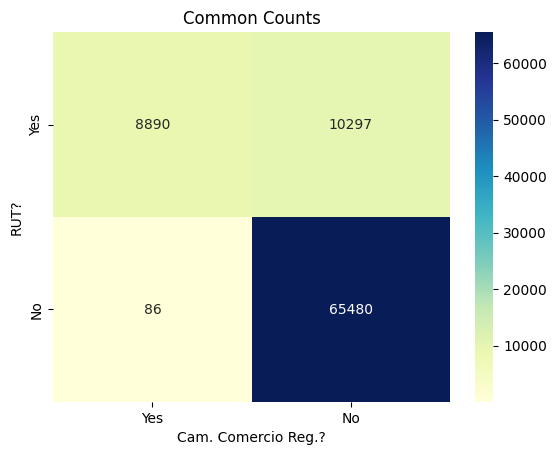

In [31]:
cross_tab = pd.crosstab(inv['P1633'], inv['P1055'])

ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel('RUT?')
plt.xlabel('Cam. Comercio Reg.?')
ax.set_xticklabels(['Yes', 'No'])
ax.set_yticklabels(['Yes', 'No'])
plt.show()

The process seems to go from RUT (easier, more people joining in total) -> Cam Comércio.   
But most businesses (76%) have none.

  1st Level - Having RUT or Cam. Com.


  2nd Level - Having RUT AND Cam Com.

In [32]:
# Owner's Health and Pensions? (1-Yes, 2-No, 3-Just H, 4-Just P)
inv.P3088.value_counts()

P3088
2    75710
1     6294
3     2637
4      112
Name: count, dtype: int64

In [33]:
# Owner's ARL? (1-Yes, 2-No)
inv.P3090.value_counts()

P3090
2    80215
1     4538
Name: count, dtype: int64

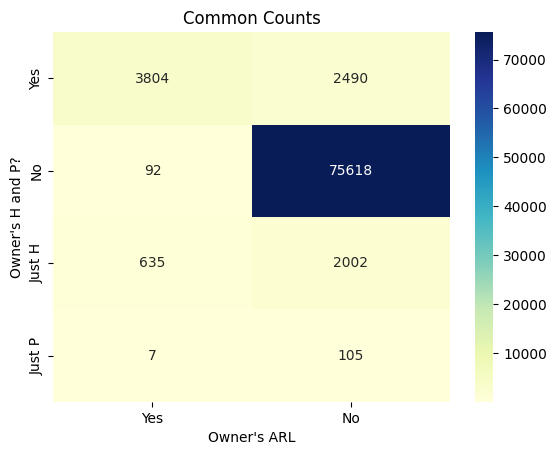

In [34]:
cross_tab = pd.crosstab(inv['P3088'], inv['P3090'])

ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("Owner's H and P?")
plt.xlabel("Owner's ARL")
ax.set_yticklabels(['Yes', 'No', 'Just H', 'Just P'])
ax.set_xticklabels(['Yes', 'No'])
plt.show()

90% of firms don't pay their owner's health, pension and ARl contributions. Less than 5% pay everything. 84% of those that pay ARL also pay health and pensions. Firms that pay just pensions are the rarest.

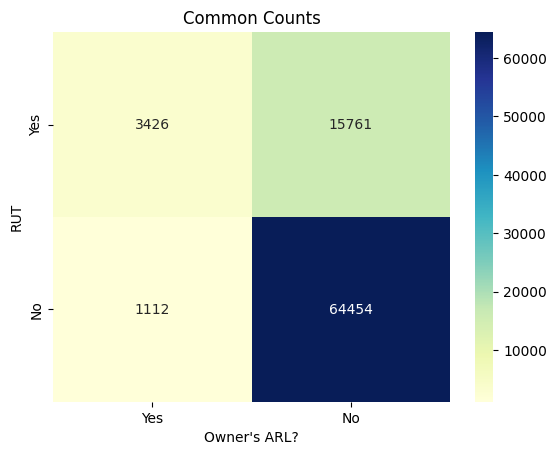

In [35]:
cross_tab = pd.crosstab(inv['P1633'], inv['P3090'])

ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("RUT")
plt.xlabel("Owner's ARL?")
ax.set_yticklabels(['Yes', 'No'])
ax.set_xticklabels(['Yes', 'No'])
plt.show()

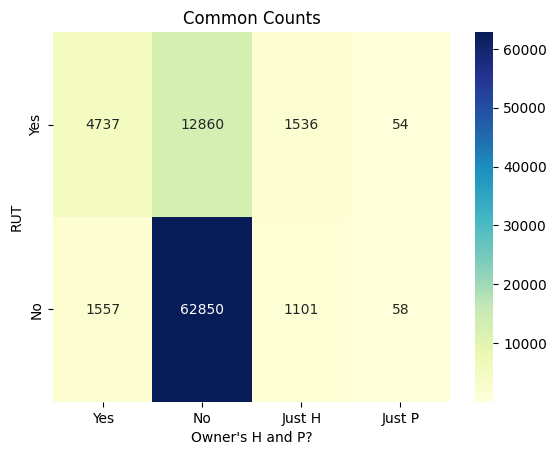

In [36]:
cross_tab = pd.crosstab(inv['P1633'], inv['P3088'])

ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("RUT")
plt.xlabel("Owner's H and P?")
ax.set_yticklabels(['Yes', 'No'])
ax.set_xticklabels(['Yes', 'No', 'Just H', 'Just P'])
plt.show()

There are many unregistered firms that pay ARL and H+P! But most of those that have RUT still don't pay. It seems to be that paying RUT is a more common first step.

In [37]:
# number of workers (including owner) on average
# 99 - doesn't say
inv.P3091.value_counts()

P3091
1     70653
2      9240
3      2871
4      1059
5       453
6       224
7       124
8        62
9        38
10       14
12        6
11        5
15        3
99        1
Name: count, dtype: int64

82% of firms have the owner as their only worker.

In [38]:
# number of firms with workers in the last year
len(inv[inv["P3091"]>1])

14100

In [39]:
# tiene personas que le ayudan? Sí = 1, No = 2
len(inv[inv["P3031"]==1])

15017

In [40]:
inv['dummy'] = (inv['P3091'] > 1).astype(int)

# there are some discrepancies between the 2 variables
cross_tab = pd.crosstab(inv['dummy'], inv['P3031'])
print(cross_tab)

P3031      1      2
dummy              
0       1608  69045
1      13409    691


/var/folders/4h/c_6klx0d0bd723smcqr1l_3h0000gn/T/ipykernel_52486/2965514946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv['dummy'] = (inv['P3091'] > 1).astype(int)


In [41]:
# how many firms pay their workers
(emicron['P3032_1']>=1).sum()

7685

In [42]:
# how many firms have unpaid workers
(inv['P3032_3']>=1).sum()

5015

In [43]:
# how many firms have paid or unpaid workers
len(inv[(inv['P3032_3']>=1) | (inv['P3032_1']>=1)])

12040

In [44]:
non_nan = inv[~inv['P3080'].isna()]
len(non_nan)

10711

In [45]:
# Employee's Healthcare and Pensions? (1-Yes,2- No, 3-Just H, 4-Just P)
# Only 11820 answers
inv.P3080.value_counts()

P3080
2.0    9492
1.0    1141
3.0      75
4.0       3
Name: count, dtype: int64

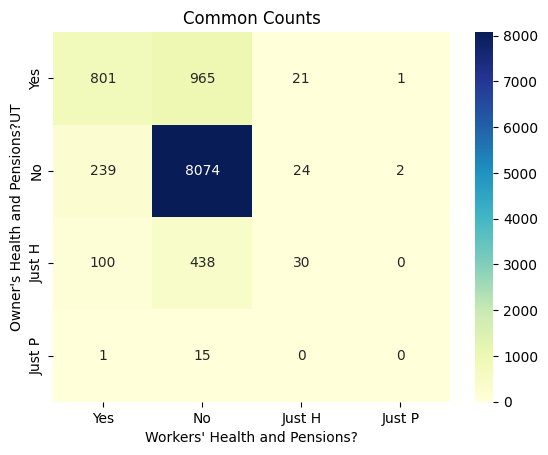

In [46]:
cross_tab = pd.crosstab(inv['P3088'], inv['P3080'])

ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("Owner's Health and Pensions?UT")
plt.xlabel("Workers' Health and Pensions?")
ax.set_yticklabels(['Yes', 'No', 'Just H', 'Just P'])
ax.set_xticklabels(['Yes', 'No', 'Just H', 'Just P'])
plt.show()

In [47]:
# Employee's ARL?
# Only 11820 answers
inv.P3084.value_counts()

P3084
2.0    9655
1.0    1056
Name: count, dtype: int64

In [48]:
# Tax on profits? (1-Yes, 2-No, 3-Isn't Eligible, 4-Missing)
# Only 19899 answers - number of businesses with RUT
inv.P2991.value_counts()

P2991
3.0    12026
1.0     3308
2.0     3227
9.0      626
Name: count, dtype: int64

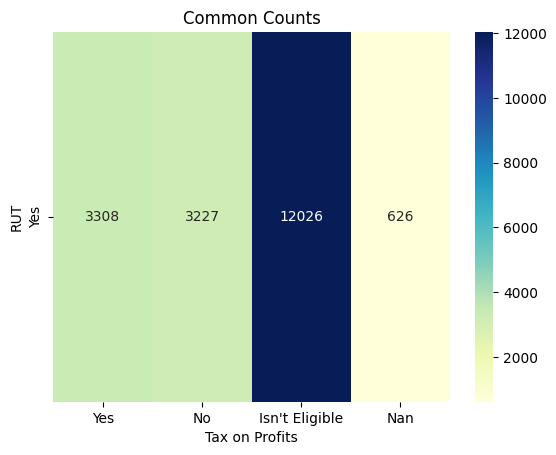

In [49]:
cross_tab = pd.crosstab(inv['P1633'], inv['P2991'])

ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("RUT")
plt.xlabel("Tax on Profits")
ax.set_yticklabels(['Yes'])
ax.set_xticklabels(['Yes', 'No', 'Isn\'t Eligible', 'Nan'])
plt.show()

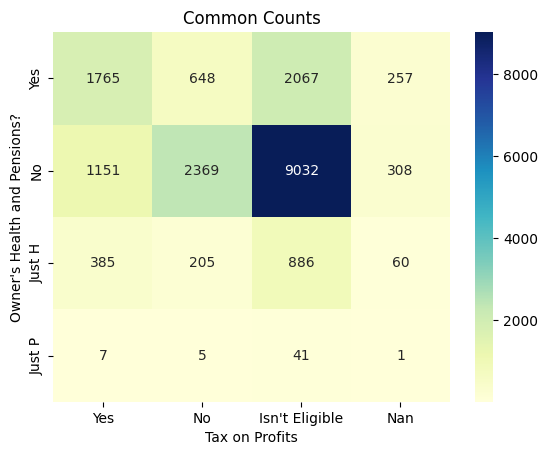

In [50]:
cross_tab = pd.crosstab(inv['P3088'], inv['P2991'])

ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("Owner's Health and Pensions?")
plt.xlabel("Tax on Profits")
ax.set_yticklabels(['Yes', 'No', 'Just H', 'Just P'])
ax.set_xticklabels(['Yes', 'No', 'Isn\'t Eligible', 'Nan'])
plt.show()

In [51]:
# IVA? (1-Yes, 2-No, 3-Isn't Eligible, 4-Missing)
# Only 19899 answers - number of businesses with RUT
# el régimen simplificado no es responsable de IVA
inv.P2992.value_counts()

P2992
3.0    17886
1.0      864
2.0      328
9.0      109
Name: count, dtype: int64

In [52]:
# ICA? (1-Yes, 2-No, 3-Isn't Eligible, 4-Missing)
# Only 19899 answers - number of businesses with RUT
inv.P2993.value_counts()

P2993
3.0    11394
1.0     4000
2.0     2986
9.0      807
Name: count, dtype: int64

Companies in each category are the same for IVA and ICA but not for tax on profits. There are more firms eligible for tax on profits. Why?

In [53]:
# Type of accounting? (1-Balance, 2-Libro, 3-Otro, 4-Informes, 5-No lleva)
inv.P640.value_counts()

P640
5    55975
3    23721
2     3332
1     1500
4      225
Name: count, dtype: int64

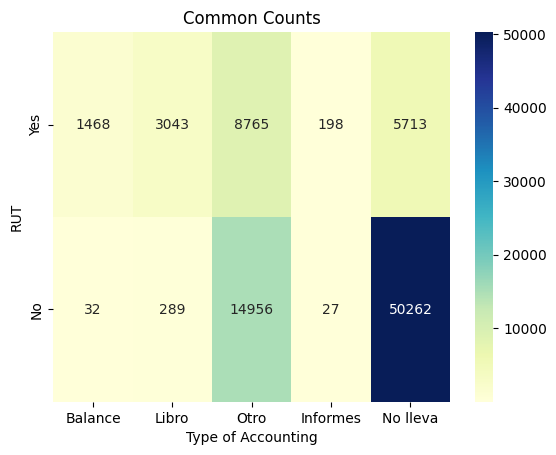

In [54]:
cross_tab = pd.crosstab(inv['P1633'], inv['P640'])

ax = sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt="d")
plt.title('Common Counts')
plt.ylabel("RUT")
plt.xlabel("Type of Accounting")
ax.set_yticklabels(['Yes', 'No'])
ax.set_xticklabels(['Balance', 'Libro', 'Otro', 'Informes', 'No lleva'])
plt.show()

Most of those without RUT registration don't have accounting records. 


### __Building the Index:__
Dimension 1 - Registration (RUT and Cam. Comercio), no Nan to handle

Dimension 2 - Healthcare and Pensions (H, P and ARL for owner and workers, if any)

Dimension 3 - Taxes (Renta, IVA, ICA if eligible, i.e., RUT != Simplificado)

Dimension 4 - Accounting (Formal), no Nan to handle

A fully informal firm will have an index of 0, while a fully formal one will have an index of 4.

In [55]:
for i in range(len(emicron)):
    # registered for both (RUT and CC)
    if emicron.at[i, 'P1633'] == 1 and emicron.at[i, 'P1055'] == 1:
        emicron.at[i, "II_D1"] = 1
    # not registered
    elif emicron.at[i, 'P1633'] == 2 and emicron.at[i, 'P1055'] == 2:
        emicron.at[i, "II_D1"] = 0
    #only registered in one
    else:
        emicron.at[i, "II_D1"] = 0.5

In [56]:
emicron.II_D1.value_counts()

II_D1
0.0    65480
0.5    10383
1.0     8890
Name: count, dtype: int64

In [57]:
for i in range(len(emicron)):
    # onwer-only firm
    if emicron.at[i, 'P3091']==1:
        # pays H,P and ARL
        if (emicron.at[i, 'P3088']==1) & (emicron.at[i, 'P3090']==1):
            emicron.at[i, 'II_D2']=1
        # pays (H,P) or ARL:
        elif (emicron.at[i, 'P3088']==1) or (emicron.at[i, 'P3090']==1):
            emicron.at[i, 'II_D2']=0.5    
        # doesn't pay
        else:
            emicron.at[i, 'II_D2']=0

    # owner and employees
    else:
        cond1=0
        cond2=0
        cond3=0
        cond4=0
        # pays (H,P) to owner
        if (emicron.at[i, 'P3088']==1):
            cond1 = 0.25
        # pays ARL to owner
        if (emicron.at[i, 'P3090']==1):
            cond2=0.25
        # pays (H,P) to workers
        if (emicron.at[i, 'P3080']==1):
            cond3=0.25
       # pays ARL to workers     
        if (emicron.at[i, 'P3084']==1):
            cond4=0.25
        emicron.at[i, 'II_D2']= cond1+cond2+cond3+cond4

In [58]:
emicron.II_D2.value_counts()

II_D2
0.00    77425
0.50     3362
1.00     2867
0.25      874
0.75      225
Name: count, dtype: int64

In [59]:
for i in range(len(emicron)):
    # pays tax on profits or not eligible
    if emicron.at[i, 'P2991'] in [1,3]:
        renta = 1/3
    # Nan, doesn't pay or doesn't want to say
    else:
        renta=0
    # iva
    if emicron.at[i, 'P2992'] in [1,3]:
        iva = 1/3
    else:
        iva=0
    # ica
    if emicron.at[i, 'P2993'] in [1,3]:
        ica = 1/3
    else:
        ica=0
    emicron.at[i, 'II_D3']=renta+iva+ica    
    

In [60]:
emicron.II_D3.value_counts()

II_D3
0.000000    65801
1.000000    13886
0.666667     2754
0.333333     2312
Name: count, dtype: int64

In [61]:
# categories taken from DANE's SISTEMA DE INFORMACIÓN PARA ACTIVIDADES ECONÓMICAS INFORMALES - SIECI report

for i in range(len(emicron)):
    # doesn't have accounting system
    if emicron.at[i, 'P640'] == 5:
        emicron.at[i, "II_D4"] = 0
    # informal accounting
    elif emicron.at[i, 'P640'] in [3]:
        emicron.at[i, "II_D4"] = 0.5
    #formal accounting
    elif emicron.at[i, 'P640'] in [1, 2, 4]:
        emicron.at[i, "II_D4"] = 1

In [62]:
emicron.II_D4.value_counts()

II_D4
0.0    55975
0.5    23721
1.0     5057
Name: count, dtype: int64

In [63]:
for i in range(len(emicron)):
    emicron.at[i, 'II'] = emicron.at[i, 'II_D1']+emicron.at[i, 'II_D2']+emicron.at[i, 'II_D3']+emicron.at[i, 'II_D4']

Analysis of results

In [64]:
weighted_counts = emicron.groupby('II')['F_EXP'].sum()

total_weight = weighted_counts.sum()

weighted_percentages = (weighted_counts / total_weight) * 100

print(weighted_percentages)

II
0.000000    58.492710
0.250000     0.078737
0.500000    17.167289
0.750000     0.141484
0.833333     0.811032
1.000000     1.245063
1.083333     0.000044
1.166667     0.313776
1.250000     0.015080
1.333333     0.954725
1.416667     0.003394
1.500000     3.362523
1.583333     0.029232
1.666667     0.621608
1.750000     0.033788
1.833333     0.597856
1.916667     0.052661
2.000000     3.920309
2.083333     0.017792
2.166667     0.905857
2.250000     0.145880
2.333333     0.511557
2.333333     0.012921
2.416667     0.033753
2.500000     3.986684
2.583333     0.037394
2.583333     0.000206
2.666667     0.745717
2.750000     0.205342
2.833333     0.065265
2.833333     0.014247
2.916667     0.047856
3.000000     2.708986
3.083333     0.009948
3.166667     0.197910
3.250000     0.360093
3.333333     0.053929
3.416667     0.013408
3.500000     1.086680
3.666667     0.118618
3.750000     0.181279
4.000000     0.697369
Name: F_EXP, dtype: float64


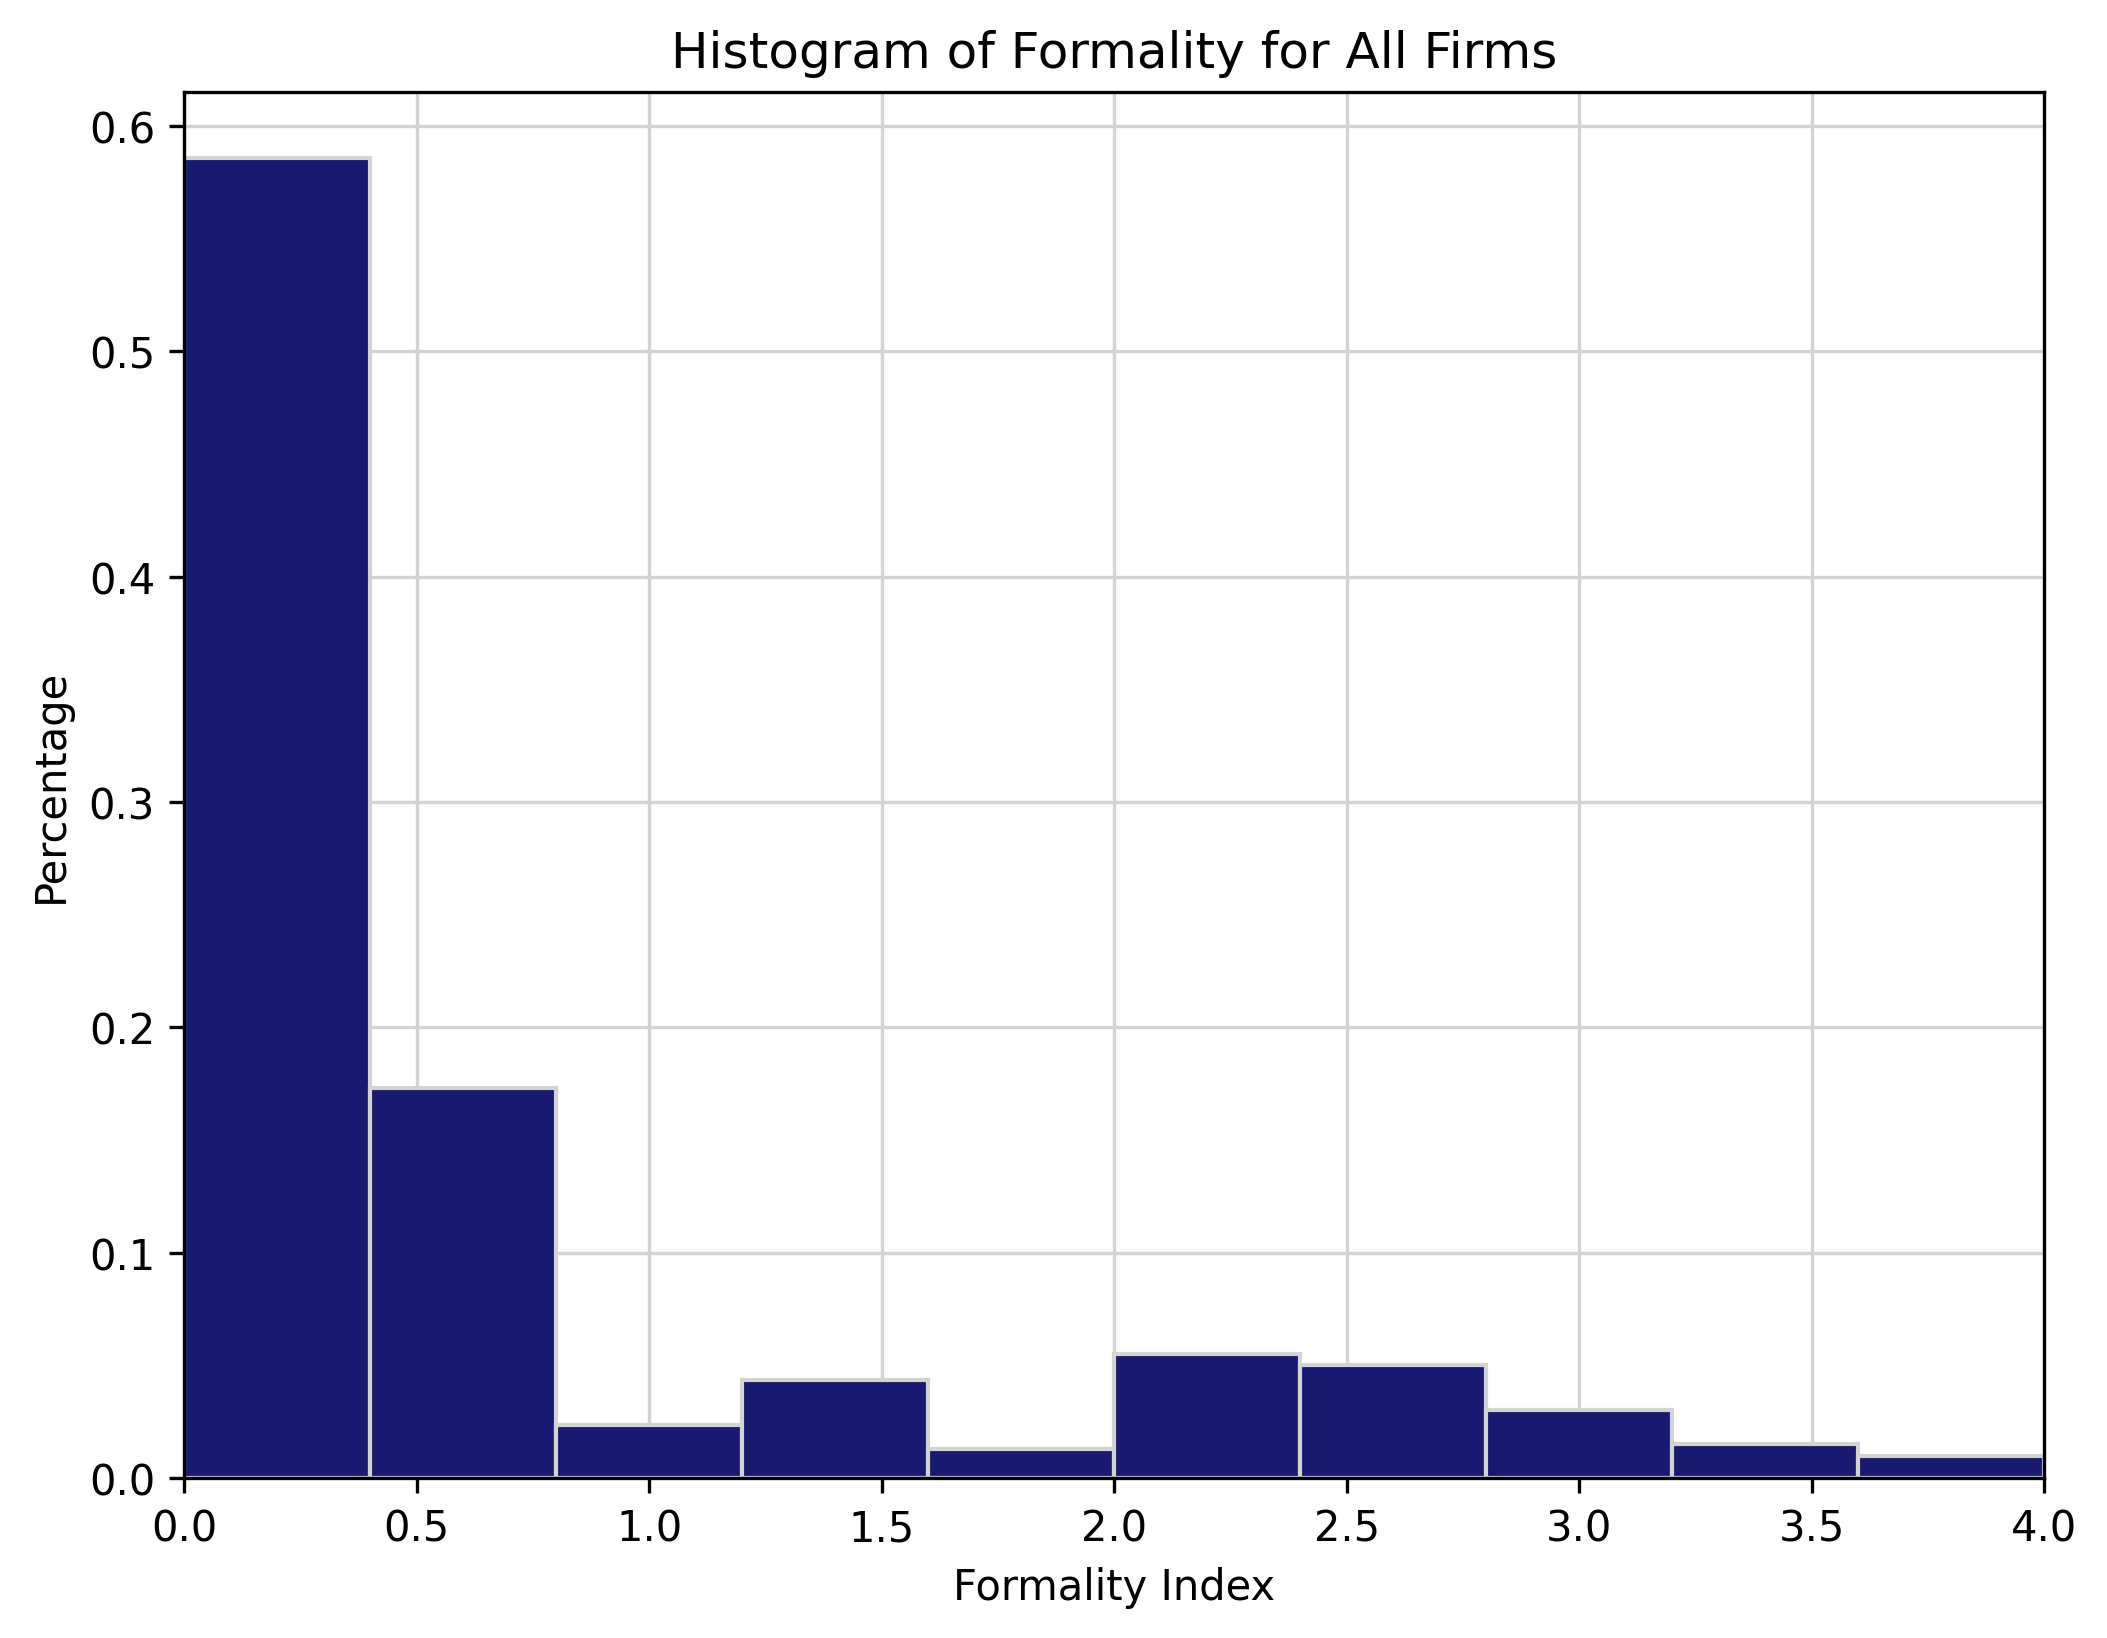

In [65]:
melted_data = emicron.melt(value_vars=['II'], var_name='Index', value_name='Value')

plt.figure(figsize=(8, 6), dpi=300)
ax = plt.gca()
hist1=sns.histplot(data=melted_data, x='Value', bins=10, kde=False, edgecolor='lightgray', stat='probability', color='#191970', alpha=1, weights=emicron['F_EXP'])
plt.title("Histogram of Formality for All Firms")
plt.xlabel("Formality Index")
plt.ylabel("Percentage")
plt.xlim(0,4)
plt.ylim()
ax.set_axisbelow(True)
plt.grid(color='lightgray')
plt.show()

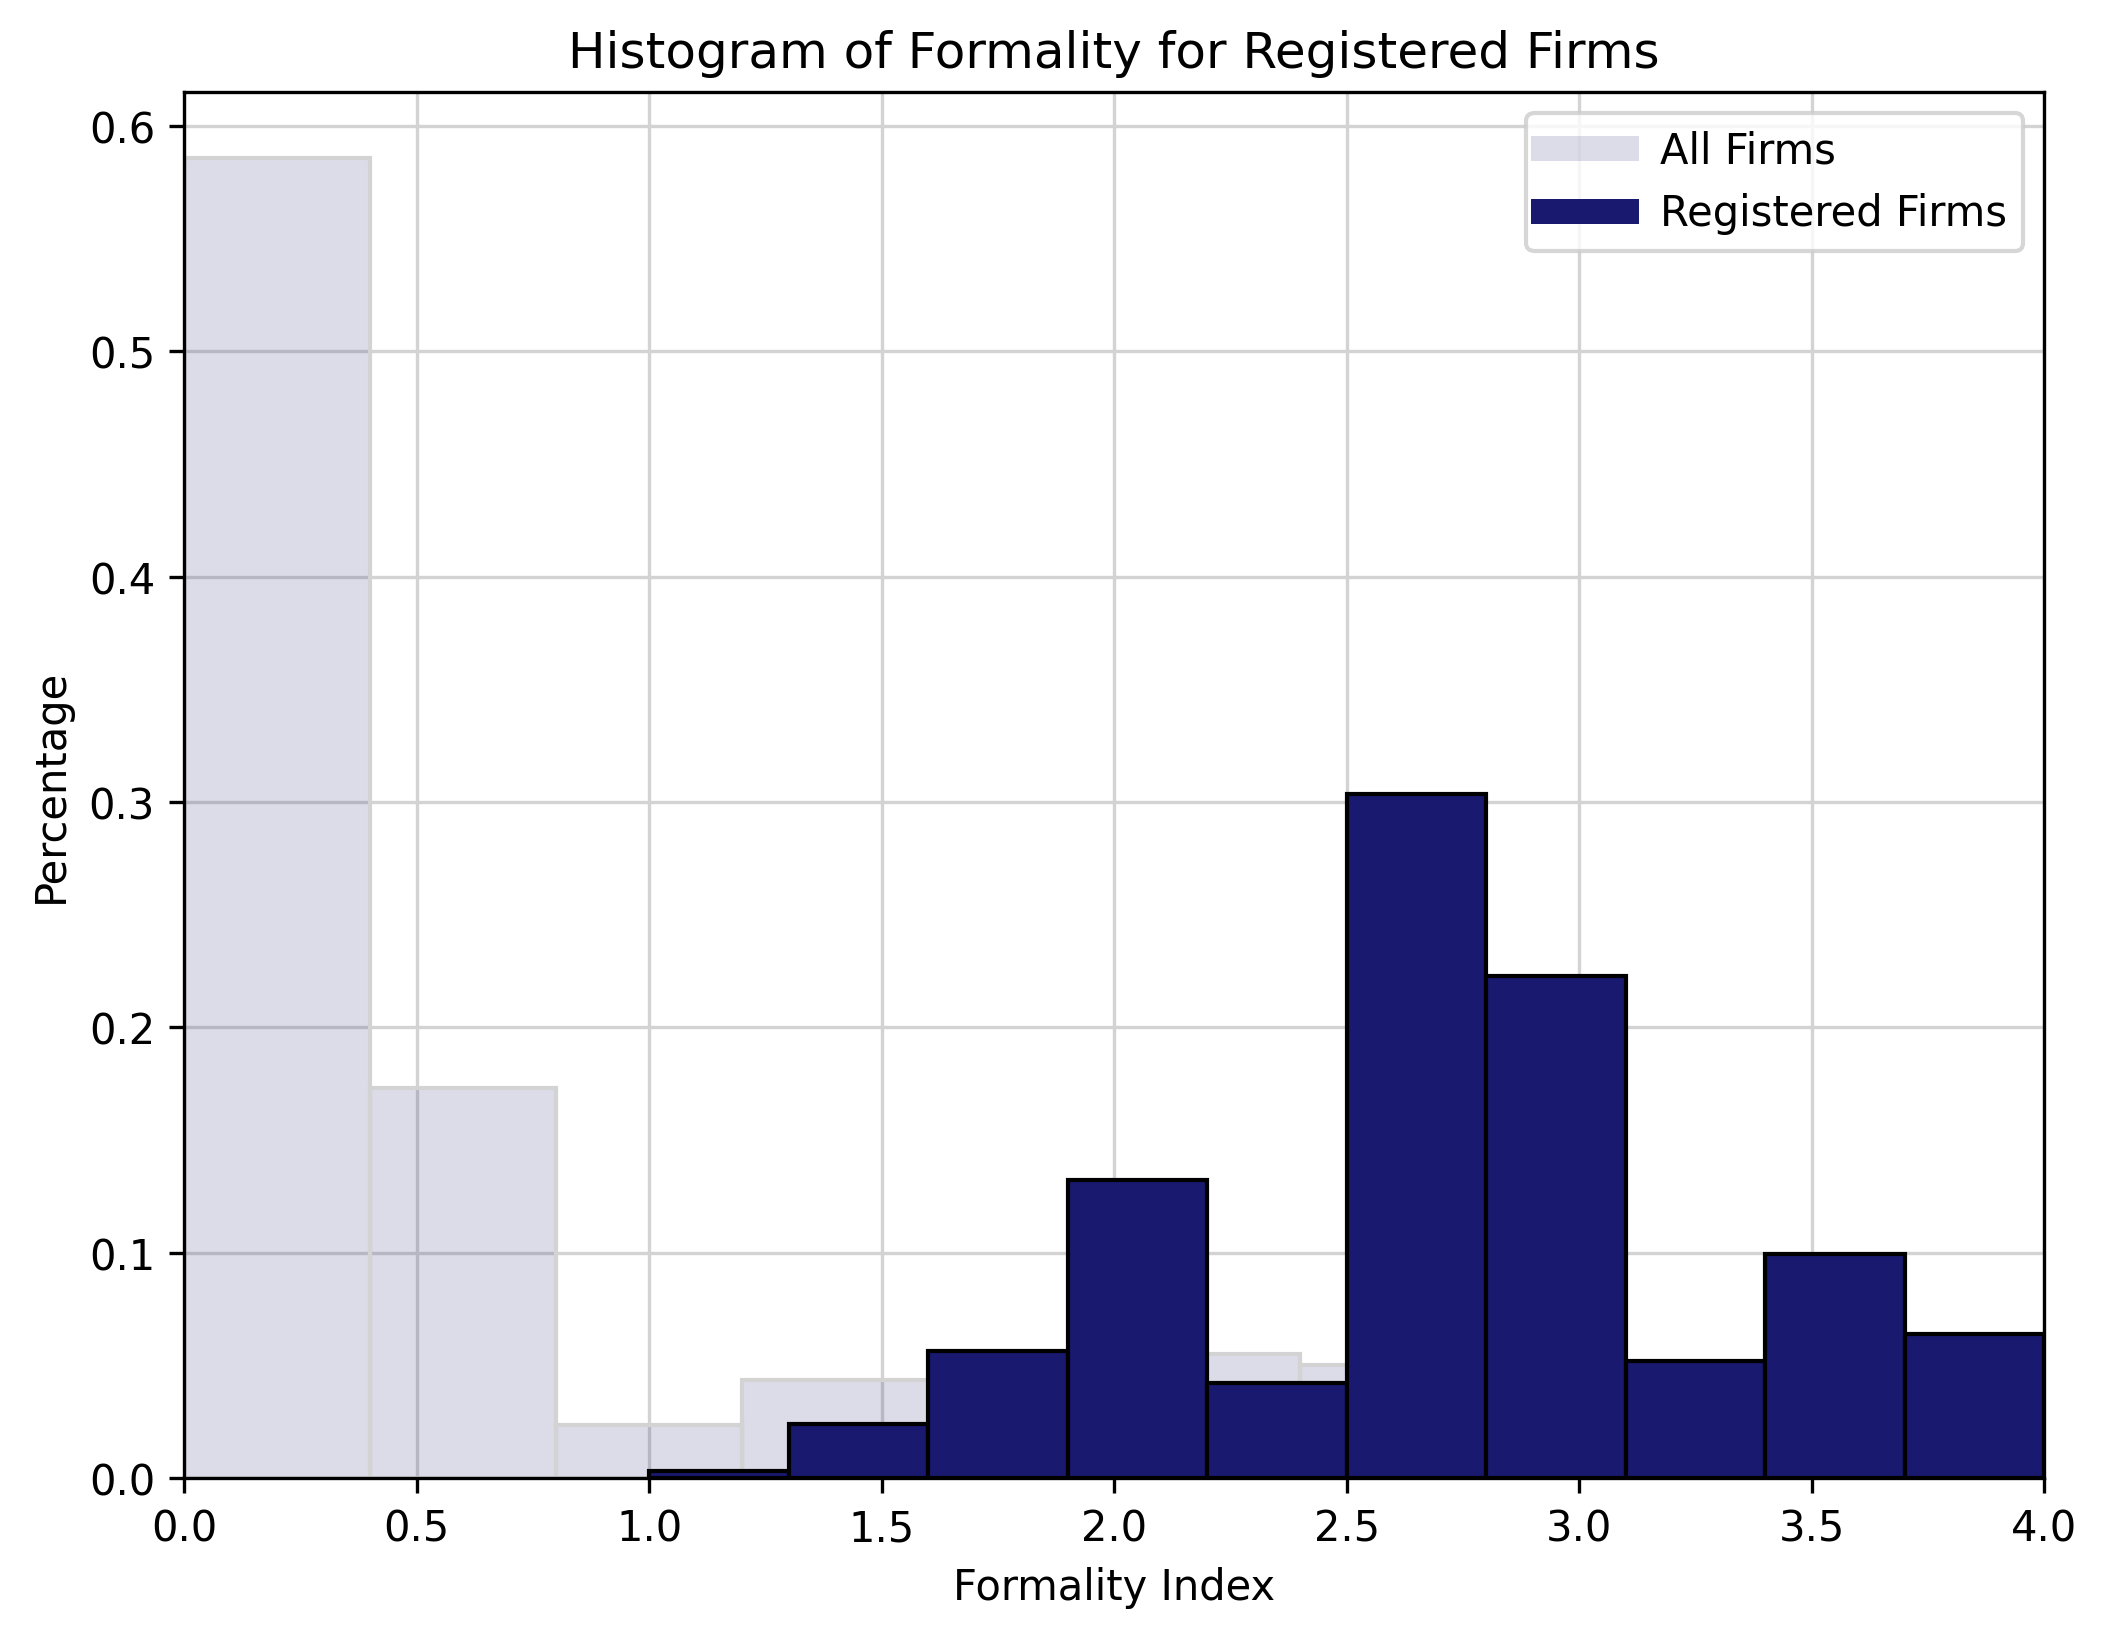

In [66]:
melted_data = emicron.melt(value_vars=['II'], var_name='Index', value_name='Value')
emicron2 = emicron[emicron['II_D1']==1]
melted_data2 = emicron2.melt(value_vars=['II'], var_name='Index', value_name='Value')

plt.figure(figsize=(8, 6), dpi=300)
ax = plt.gca()
hist1=sns.histplot(data=melted_data, x='Value', bins=10, kde=False, edgecolor='lightgray', stat='probability', color='#191970', alpha=0.15, weights=emicron['F_EXP'])
hist1.set_zorder(2)
hist2=sns.histplot(data=melted_data2, x='Value', bins=10, kde=False, edgecolor='black', stat='probability', color='#191970', alpha=1, weights=emicron['F_EXP'])
hist1.set_zorder(3)
plt.title("Histogram of Formality for Registered Firms")
plt.xlabel("Formality Index")
plt.ylabel("Percentage")
plt.xlim(0,4)
plt.ylim()
legend_elements = [plt.Line2D([0], [0], color='#191970', lw=6, label='All Firms', alpha=0.15),
plt.Line2D([0], [0], color='#191970', lw=6, label='Registered Firms', alpha=1)]
plt.legend(handles=legend_elements, loc='upper right')
ax.set_axisbelow(True)
plt.grid(color='lightgray', zorder=1)
plt.show()

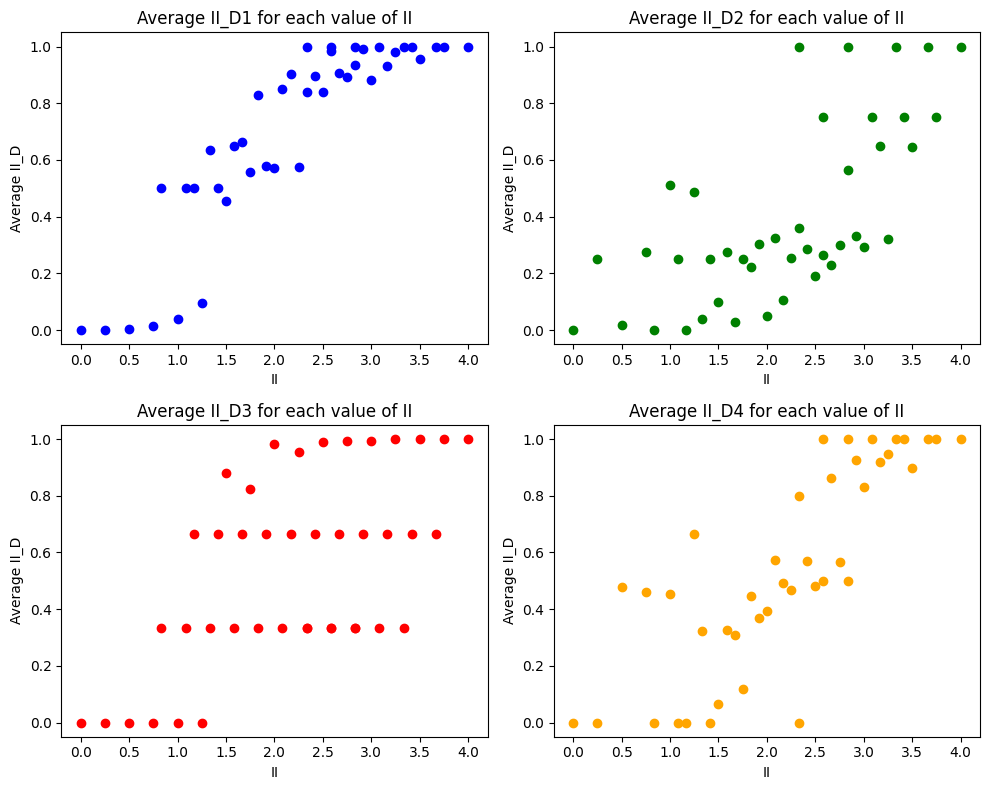

In [67]:
# calculate the average of each II_D variable grouped by II
average_by_II = emicron.groupby('II')[['II_D1', 'II_D2', 'II_D3', 'II_D4']].mean()
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()
colors = ['blue', 'green', 'red', 'orange']
for i, (ii_d, color) in enumerate(zip(average_by_II.columns, colors)):
    axs[i].scatter(average_by_II.index, average_by_II[ii_d], color=color)
    axs[i].set_title(f'Average {ii_d} for each value of II')
    axs[i].set_xlabel('II')
    axs[i].set_ylabel('Average II_D')

plt.tight_layout()
plt.show()

In [68]:
department = {
    5: "Antioquia",
    8: "Atlántico",
    11: "Bogotá, D. C.",
    13: "Bolívar",
    15: "Boyacá",
    17: "Caldas",
    18: "Caquetá",
    19: "Cauca",
    20: "Cesar",
    23: "Córdoba",
    25: "Cundinamarca",
    27: "Chocó",
    41: "Huila",
    44: "La Guajira",
    47: "Magdalena",
    50: "Meta",
    52: "Nariño",
    54: "Norte De Santander",
    63: "Quindío",
    66: "Risaralda",
    68: "Santander",
    70: "Sucre",
    73: "Tolima",
    76: "Valle Del Cauca",
    88: "Archipiélago de San Andrés, Providencia y Santa Catalina"}

In [69]:
emicron['Department_Name'] = emicron['COD_DEPTO'].map(department)

In [70]:
emicron.groupby("Department_Name")[["II", "II_D1", "II_D2", "II_D3", "II_D4"]].mean()

,II,II_D1,II_D2,II_D3,II_D4
Department_Name,,,,,
Antioquia,0.854748,0.226468,0.167534,0.270304,0.190441
"Archipiélago de San Andrés, Providencia y Santa Catalina",0.995674,0.349197,0.153276,0.268232,0.224969
Atlántico,0.441770,0.101929,0.017519,0.130203,0.192119
"Bogotá, D. C.",1.306369,0.367839,0.163900,0.439670,0.334961
Bolívar,0.200249,0.042555,0.020878,0.047619,0.089197
Boyacá,1.008632,0.344406,0.118116,0.312500,0.233610
Caldas,1.102249,0.308713,0.135932,0.389999,0.267606
Caquetá,0.624414,0.186506,0.025627,0.253162,0.159119
Cauca,0.717117,0.212034,0.051474,0.226225,0.227384


In [71]:
emicron.groupby("GRUPOS4")["II"].mean()

GRUPOS4
1    0.219823
2    0.622600
3    0.826480
4    0.599989
5    0.658333
Name: II, dtype: float64

In [72]:
# main reason for starting a business
emicron.groupby("P3051")["II"].mean()

P3051
1    0.318305
2    0.886673
3    0.447288
4    0.467697
5    1.091392
6    0.212825
7    0.874401
Name: II, dtype: float64

Exporting DataFrame with Index variables:

In [73]:
emicron.to_csv('../../Data/emicron_index.csv')